In [18]:
from transmission_line_simulator import *
import scipy.constants

# Create a curcuit

Firstly, we need to create a topology of our curcuit.
Each element has a type, a name and number of nodes characterized him.
1. element_1 = type()
2. circuit = transmission_line_system()
3. circuit.add_element(element_1, list of nodes)


In [19]:
claw = capacitor()
#qubit_cap = capacitor()
#qubit_inductor = inductor()
source = port()
analyzer_feedline = transmission_line_coupler(n=1)
analyzer = port()

GND = short()
resonator_short_end = transmission_line_coupler(n=1)
resonator_claw_end = transmission_line_coupler(n=1)
coupler = transmission_line_coupler()

circuit = transmission_line_system()

circuit.add_element(source, [1])
circuit.add_element(coupler, [1, 2, 3, 4])
circuit.add_element(analyzer, [3])
circuit.add_element(resonator_short_end, [4, 0])
circuit.add_element(resonator_claw_end, [2, 5])
circuit.add_element(claw, [5, 0])
#circuit.add_element(qubit_cap, [6, 0])
#circuit.add_element(qubit_inductor, [6, 0])
circuit.add_element(GND, [0])

In [20]:
source.Z0=50
analyzer.Z0=50

coupler.l=0.4e-3
coupler.Ll=np.asarray([[473.815e-9,175.09e-9],[175e-9,556.2e-9]])
coupler.Cl=np.asarray([[164.76e-12,-51.866e-12],[-51.866e-12,140.355e-12]])
coupler.Rl=np.zeros(coupler.Ll.shape, dtype=np.int)
coupler.Gl=np.zeros(coupler.Ll.shape, dtype=np.int)


resonator_short_end.l = 3.6e-3
resonator_short_end.Cl = 140.453e-12
resonator_short_end.Ll = 491.157e-9
resonator_short_end.Rl = 0
resonator_short_end.Gl = 0

resonator_claw_end.l = 1e-3
resonator_claw_end.Cl = 140.453e-12
resonator_claw_end.Ll = 491.157e-9
resonator_claw_end.Rl = 0
resonator_claw_end.Gl = 0

claw.C=10e-15
#qubit_cap.C=70e-15
#qubit_inductor.L=19e-9

# Simulate scattering parameter S21

In [21]:
nop = 5000
frequency = np.linspace(4e9+0j, 6.5e9+0j, nop)
y = np.zeros(nop, dtype=complex)

In [22]:
matrix_of_curcuit=circuit.create_boundary_problem_matrix(frequency[0]*2*np.pi)
matrix_of_curcuit.shape

(29, 29)

In [23]:
perturbation = np.zeros((matrix_of_curcuit.shape[0],1))
perturbation[0]=1
for i in range(nop):
    matrix_of_curcuit=circuit.create_boundary_problem_matrix(frequency[i]*2*np.pi)
    s21= np.linalg.solve(matrix_of_curcuit, perturbation)
    y[i]=s21[2]
abs_S21 = np.abs(y)
angle_S21 = np.angle(y)

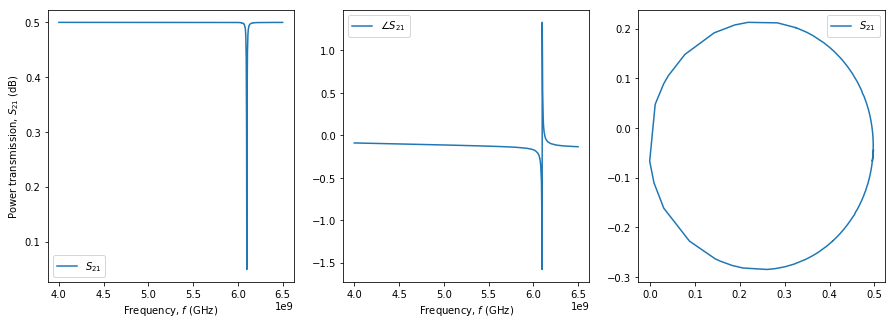

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(frequency.real, abs_S21, label = '$S_{21}$')
plt.xlabel('Frequency, $f$ (GHz)')
plt.ylabel('Power transmission, $S_{21}$ (dB)')
plt.legend()
plt.subplot(132)
plt.plot(frequency.real, angle_S21, label = '$\\angle S_{21}$')
plt.xlabel('Frequency, $f$ (GHz)')
plt.legend()
plt.subplot(133)
plt.plot(y.real, y.imag, label = '$S_{21}$')
plt.legend()
plt.show()

In [9]:
# def lorentzian(f, f_r, width, A, offset):
#     return A * width**2 /((f-f_r)**2+width**2) + offset

In [11]:
# p0 = (frequency[np.argmax(abs_S21)].real,1000,1000,10)
# p0

In [13]:
# from scipy.optimize import curve_fit
# p_opt, cov = curve_fit(lorentzian, frequency.real, abs_S21, p0 = p0)
# p_opt

In [12]:
# fig, ax = plt.subplots(figsize=(20, 10))
# plt.plot(frequency.real, abs_S21)
# plt.plot(frequency.real, lorentzian(frequency.real, *p_opt))

In [14]:
# fig.savefig("example1.png")

# Fitting using resonator_tools

In [25]:
import resonator_tools
from resonator_tools.circuit import notch_port, reflection_port

In [27]:
fitter = notch_port(f_data=frequency.real, z_data_raw=y)

In [28]:
fitter.autofit()

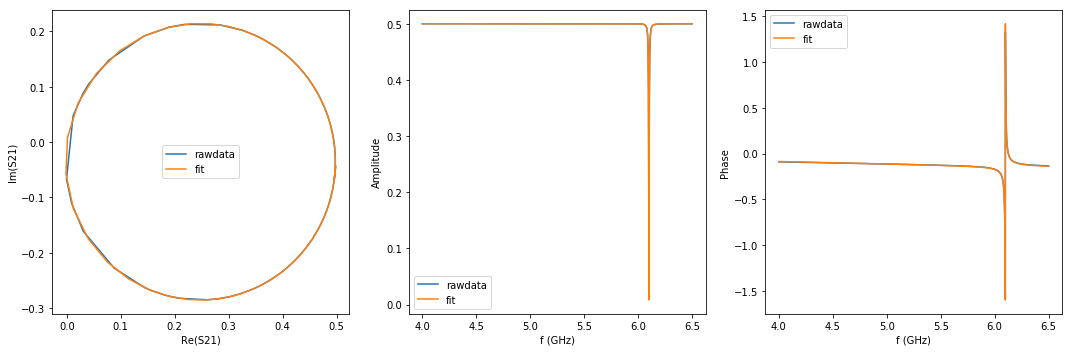

In [29]:
fitter.plotall()

In [31]:
fitter.fitresults

{'Qi_dia_corr': -8256700.945613285,
 'Qi_no_corr': -7285753.879284091,
 'absQc': 810.4312751463483,
 'Qc_dia_corr': 810.4418762863144,
 'Ql': 810.521433547223,
 'fr': 6099339566.9935,
 'theta0': -3.136477828116734,
 'phi0': 0.005114825466309479,
 'chi_square': 1.0818273735525306e-05,
 'delay': 4.0267724136984906e-12,
 'a': 0.49998321747677366,
 'alpha': 0.017165447375973253}